# Lecture: Complex Network Analysis

Prof. Dr. Michael Gertz

Winter Semester 2021/22

## Assignment 3 - Growth and Preferential Attachment

Students: Felix Hausberger, Nils Krehl, Patrick Günther

In [1]:
import networkx as nx
import numpy as np
import powerlaw as pl
import matplotlib.pyplot as plt

## 1.

In [2]:
def barabasi_albert(G, t, m):
    N_0 = G.number_of_nodes()
    for node in range(N_0, N_0 + t):
        G.add_node(node)
        N = G.number_of_nodes()
        links_added = 0
        while(links_added < m):
            link_probabilities = np.empty(N)
            sum_of_degrees = np.sum([G.degree(n) for n in G.nodes()])
            for source_node, degree in G.degree():
                link_probabilities[source_node] = degree / sum_of_degrees
            target_node = np.random.choice(N, p=link_probabilities)
            if(source_node != target_node and not G.has_edge(source_node, target_node)):
                G.add_edge(source_node, target_node)
                links_added += 1;
    return G

## 2.

In [3]:
G = barabasi_albert(nx.complete_graph(5), 100, 3)
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")
print(f"Sum of the node degrees: {np.sum([G.degree(n) for n in G.nodes()])}")

Number of nodes: 105
Number of edges: 310
Sum of the node degrees: 620


## 3.

Calculating best minimal value for power law fit
D:\Benutzer\Felix\anaconda3\lib\site-packages\powerlaw.py:699: RuntimeWarning: invalid value encountered in true_divide
  (CDF_diff**2) /
D:\Benutzer\Felix\anaconda3\lib\site-packages\powerlaw.py:699: RuntimeWarning: divide by zero encountered in true_divide
  (CDF_diff**2) /
D:\Benutzer\Felix\anaconda3\lib\site-packages\powerlaw.py:699: RuntimeWarning: invalid value encountered in true_divide
  (CDF_diff**2) /


Average local clustering coefficient: 0.04 (expected 0.05)
Average distance: 3.19 (expected 3.58)
Power-law degree exponent: 2.76 (expected 3)


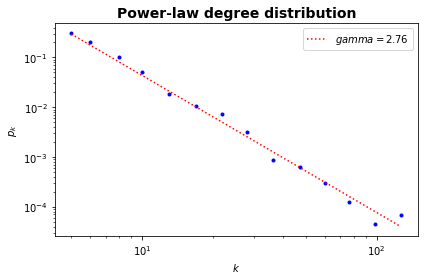

In [4]:
G = barabasi_albert(nx.complete_graph(5), 1000, 4)
N = G.number_of_nodes()

x, y = pl.pdf([G.degree(n) for n in G.nodes()], linear_bins=False)
fit = pl.Fit([val for (node, val) in G.degree()], discrete=True)

fig, ax = plt.subplots()
ax.semilogx(x[1:], y, "b.")
fit.power_law.plot_pdf(ax=ax, linestyle=":", color="r", label="$gamma = {}$".format(np.round(fit.alpha, 2)))
ax.set_title("Power-law degree distribution", fontweight="bold", fontsize=14)
ax.set_ylabel("$p_k$")
ax.set_xlabel("$k$")
ax.legend()
fig.tight_layout()

print(f"Average local clustering coefficient: {np.round(nx.average_clustering(G), 2)} (expected {np.round((np.log(N)**2)/N, 2)})")
print(f"Average distance: {np.round(nx.average_shortest_path_length(G), 2)} (expected {np.round(np.log(N)/np.log(np.log(N)), 2)})")
print(f"Power-law degree exponent: {np.round(fit.alpha, 2)} (expected {3})")

The values of the generated instance approach the expected values. The expected values are based on an analytical formula for the case that $t \rightarrow \infty$. As we only generate a small network, approaching the analytical with our experimental values is fine.